## example of gaussian process regression with sklearn

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
## example data
nx =15
x = np.arange(nx).reshape([-1,1]);
y = np.random.rand(nx)+x.ravel()

In [5]:
X = sm.add_constant(x) # adding a constant
lm = sm.OLS(y, X).fit() # fitting the model
c0,c1 = lm.params

In [6]:
## gaussian process regression
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel,alpha=0.1,normalize_y=True)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x, y);



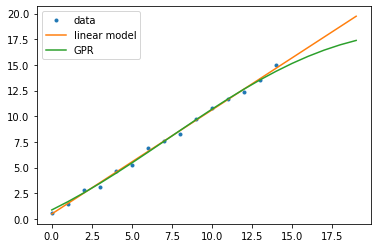

In [7]:
xpred = np.arange(20).reshape([-1,1])
y_pred, sigma = gp.predict(xpred, return_std=True)
plt.plot(x,y,'.',label='data')
plt.plot(xpred,c0+c1*xpred,label='linear model')
plt.plot(xpred,y_pred,label='GPR')
plt.legend();

/glade/work/djk2120/miniconda3/envs/ppe-py/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


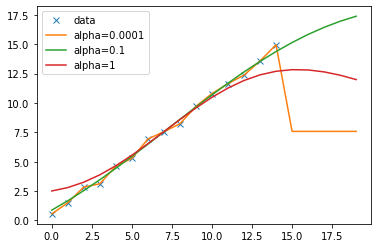

In [8]:
## gaussian process regression
# Instantiate a Gaussian Process model
plt.plot(x,y,'x',label='data')
for alpha in [1e-4,1e-1,1]:
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel,alpha=alpha,normalize_y=True)
    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(x, y);
    y_pred, sigma = gp.predict(xpred, return_std=True)
    plt.plot(xpred,y_pred,label='alpha='+str(alpha))
plt.legend();